In [43]:
import pandas as pd


df = pd.read_excel("vendas.xlsx")

In [44]:
# 1.Padronizar a coluna 'categoria' para minúsculas.
df["categoria"] = df["categoria"].str.lower()

In [45]:
# 2.Remover registros onde a quantidade está ausente
print(df.isnull())  # Verificar se existem dados faltando
df_nulos = df.dropna()
print(df_nulos)

      data   loja  categoria  produto  quantidade  valor_venda
0    False  False      False    False       False        False
1    False  False      False    False       False        False
2    False  False      False    False       False        False
3    False  False      False    False       False        False
4    False  False      False    False        True         True
..     ...    ...        ...      ...         ...          ...
495  False  False      False    False       False        False
496  False  False      False    False       False        False
497  False  False      False    False       False        False
498  False  False      False    False       False        False
499  False  False      False    False       False        False

[500 rows x 6 columns]
          data         loja         categoria          produto  quantidade  \
0   2024-07-20  Vento Norte  eletrodomesticos        Aquecedor         5.0   
1   2024-05-30  Vento Norte           sazonal     Guarda-chuva  

In [46]:
# 3. Remover espaços extras e padronizar com primeira letra maiúscula (estilo título)
df["loja"] = df["loja"].str.strip().str.title()

df["categoria"] = df["categoria"].str.strip().str.title()

df["produto"] = df["produto"].str.strip().str.title()

In [47]:
# 4. Garantir que a coluna data seja datetime
df["data"] = pd.to_datetime(df["data"])

In [48]:
# 5. Calcular valor unitário real das vendas válidas
df["valor_unitario"] = df["valor_venda"]/df["quantidade"]
print(df["valor_unitario"])


0       81.11
1      477.70
2      411.59
3      258.99
4         NaN
        ...  
495    386.43
496    230.89
497     73.55
498    293.93
499    493.27
Name: valor_unitario, Length: 500, dtype: float64


In [49]:
# 6. Calcular valor médio unitário por produto (sem considerar nulos)
media_unitaria = df.groupby("produto")["valor_unitario"].mean()
print(media_unitaria)

produto
Aquecedor          209.272667
Ar-Condicionado    285.399667
Blusa Infantil     290.070938
Calça              266.699130
Camiseta           253.658333
Casaco             281.150000
Guarda-Chuva       265.004286
Lancheira          271.679000
Manta Térmica      261.928182
Mochila            303.505484
Protetor Solar     299.157500
Ventilador         287.489310
Vestido            298.542174
Name: valor_unitario, dtype: float64


In [50]:
# 7. Agrupar e calcular média
media_venda = df["valor_venda"].mean()
print(f"{media_venda:.2f}")

1477.53


In [51]:
# 8. Preencher valor_unitario ausente
df['valor_unitario'].fillna(0, inplace=True)
print(df["valor_unitario"])

0       81.11
1      477.70
2      411.59
3      258.99
4        0.00
        ...  
495    386.43
496    230.89
497     73.55
498    293.93
499    493.27
Name: valor_unitario, Length: 500, dtype: float64


C:\Users\50290149851\AppData\Local\Temp\ipykernel_1424\3708606078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['valor_unitario'].fillna(0, inplace=True)


In [52]:
# 9. Recalcular valor_venda
df["valor_venda"] = df["quantidade"] * df["valor_unitario"]
print(df["valor_venda"])

0       405.55
1      2866.20
2      3292.72
3      1294.95
4          NaN
        ...   
495    1545.72
496     230.89
497     441.30
498     293.93
499    1479.81
Name: valor_venda, Length: 500, dtype: float64


In [62]:
# 10. Salvar o novo DataFrame limpo em um novo arquivo Excel
import matplotlib.pyplot as plt
import seaborn as sn
df.to_excel("vendas_atualizada.xlsx", index=False)

ANÁLISE

In [54]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
total_vendas_por_loja = df.groupby('loja')['valor_venda'].sum()
print(total_vendas_por_loja)

loja
Chuva Clara    167110.14
Porto Sol      148059.25
Vento Norte    160780.08
Vila Neve      144611.09
Name: valor_venda, dtype: float64


In [55]:
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
df["data_mês"] = df["data"].dt.to_period("M")
df["variação"] = df["valor_venda"].pct_change()*100
variacao_mensal = df.groupby("data_mês")["variação"].mean()
print(variacao_mensal)

data_mês
2024-01           inf
2024-02           inf
2024-03           inf
2024-04           inf
2024-05           inf
2024-06           inf
2024-07           inf
2024-08           inf
2024-09    274.761313
2024-10           inf
2024-11           inf
2024-12           inf
Freq: M, Name: variação, dtype: float64


C:\Users\50290149851\AppData\Local\Temp\ipykernel_1424\2288816827.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["variação"] = df["valor_venda"].pct_change()*100


In [56]:
# 3. Agrupar por mês e somar vendas
df["data_mês"] = df["data"].dt.to_period("M")
total_por_mes = df.groupby("data_mês")["valor_venda"].sum()
print(total_por_mes)


data_mês
2024-01    60691.71
2024-02    44847.58
2024-03    66190.62
2024-04    43056.45
2024-05    48735.05
2024-06    56312.80
2024-07    52659.94
2024-08    47412.70
2024-09    57258.88
2024-10    48616.57
2024-11    53871.05
2024-12    40907.21
Freq: M, Name: valor_venda, dtype: float64


In [57]:
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.
mais_vendidos = df.groupby("produto")["quantidade"].sum()
print(mais_vendidos)



produto
Aquecedor          215.0
Ar-Condicionado    153.0
Blusa Infantil     181.0
Calça              163.0
Camiseta           130.0
Casaco             156.0
Guarda-Chuva       253.0
Lancheira          191.0
Manta Térmica      215.0
Mochila            192.0
Protetor Solar     260.0
Ventilador         165.0
Vestido            148.0
Name: quantidade, dtype: float64


In [58]:
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
mais_vendas = df.groupby("categoria")["valor_venda"].sum()
print(mais_vendas)

categoria
Eletrodomesticos    125584.66
Infantil            157641.01
Roupas              161911.43
Sazonal             175423.46
Name: valor_venda, dtype: float64


In [59]:
# 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.
lojas_mais_vendas = df.groupby(["loja","categoria"])["quantidade"].sum()
print(lojas_mais_vendas)

loja         categoria       
Chuva Clara  Eletrodomesticos    122.0
             Infantil            130.0
             Roupas              214.0
             Sazonal             198.0
Porto Sol    Eletrodomesticos    118.0
             Infantil            137.0
             Roupas              137.0
             Sazonal             197.0
Vento Norte  Eletrodomesticos    157.0
             Infantil            141.0
             Roupas              179.0
             Sazonal             160.0
Vila Neve    Eletrodomesticos    149.0
             Infantil            182.0
             Roupas               92.0
             Sazonal             182.0
Name: quantidade, dtype: float64


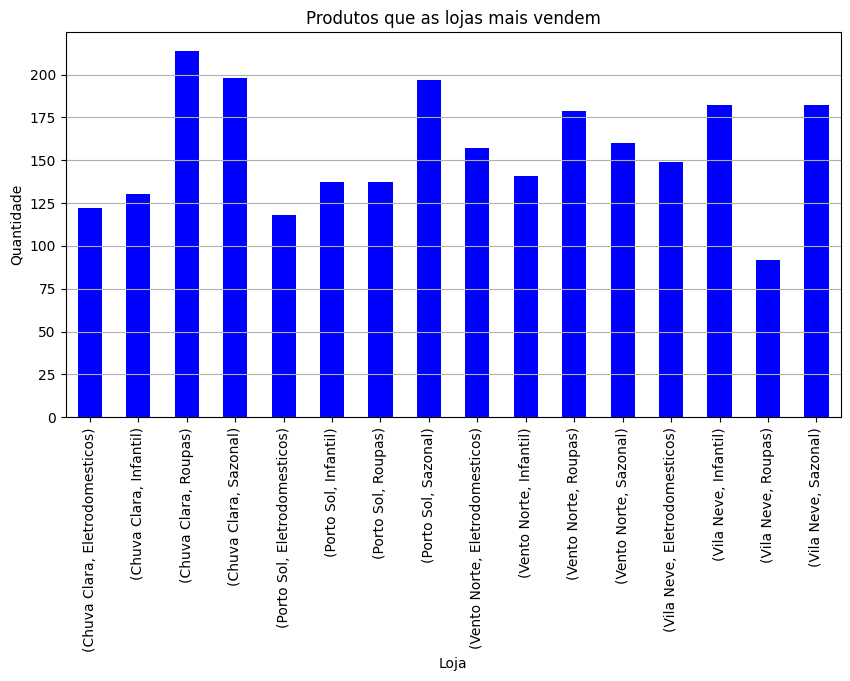

In [63]:

# 7. Plotar como gráfico de barras empilhadas
plt.figure(figsize=(10,5))
lojas_mais_vendas.plot(kind="bar", color = "blue")
plt.title("Produtos que as lojas mais vendem")
plt.xlabel("Loja")
plt.ylabel("Quantidade")
plt.xticks(rotation = 90)
plt.grid(axis = "y")
plt.show()